In [1]:
from keras.datasets import imdb
# num_word 10000 means top 10000 words will be used 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)


17464789/17464789 [==============================] - 6s 0us/step


In [5]:
len(train_data)

25000

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:

# in this code we used the one hot encoding to make this data that all 10000 words are placed with 1 and 0 _ 1 ignifing that
#value is presnt while 0 that value is absent
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
#vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
from keras import models, layers

In [76]:
model=models.Sequential()
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))


In [60]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [77]:
#this one used
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [39]:
#setting aside for validations set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [40]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [78]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5173 - acc: 0.7815 - val_loss: 0.4364 - val_acc: 0.8192
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3180 - acc: 0.8967 - val_loss: 0.3107 - val_acc: 0.8831
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2419 - acc: 0.9185 - val_loss: 0.2816 - val_acc: 0.8901
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1949 - acc: 0.9339 - val_loss: 0.2735 - val_acc: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1648 - acc: 0.9457 - val_loss: 0.2830 - val_acc: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1399 - acc: 0.9560 - val_loss: 0.2854 - val_acc: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1216 - acc: 0.9625 - val_loss: 0.3017 - val_acc: 0.8848
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1039 - a

In [79]:
history_dict = history.history

In [80]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

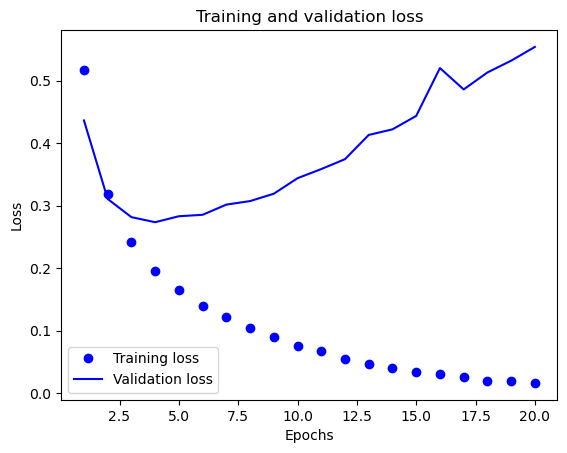

In [81]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict["acc"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

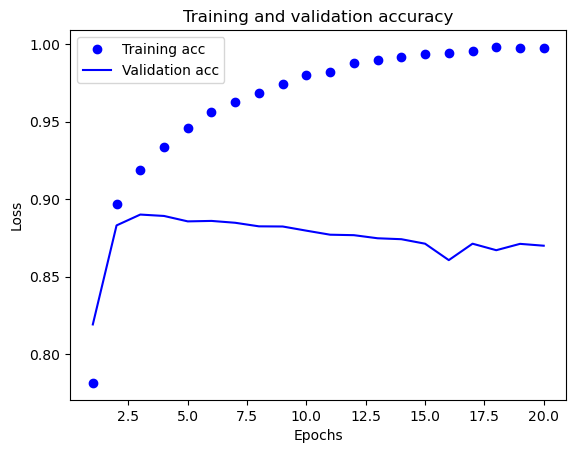

In [82]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5994 - acc: 0.8586


In [47]:
#the 0.98 and 0.01 are showing which points are more likely .98 is more likely towards1  while 0.01 is more likely towards 0
# .6 and .4 are values which contain  both elemnts of positive and negatve reviews
model.predict(x_test)

782/782 [==============================] - 3s 2ms/step


array([[2.9090067e-04],
       [1.0000000e+00],
       [3.7991151e-02],
       ...,
       [5.5662655e-05],
       [1.7495356e-04],
       [8.9740944e-01]], dtype=float32)